# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

## Import Statements

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [3]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [4]:
print(f' house hold income shape {df_hh_income.shape}')
print(f' percentage poverty shape {df_pct_poverty.shape}')
print(f' percentage completed high school {df_pct_completed_hs.shape}')
print(f' Share of race by city {df_share_race_city.shape}')
print(f' house hold income shape {df_fatalities.shape}')

 house hold income shape (29322, 3)
 percentage poverty shape (29329, 3)
 percentage completed high school (29329, 3)
 Share of race by city (29268, 7)
 house hold income shape (2535, 14)


In [5]:
df_hh_income.columns

Index(['Geographic Area', 'City', 'Median Income'], dtype='object')

In [6]:
df_pct_poverty.columns

Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')

In [7]:
df_pct_completed_hs.columns

Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')

In [8]:
df_share_race_city.columns

Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')

In [9]:
df_fatalities.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [10]:
print(df_hh_income.duplicated().values.any())
print(df_pct_poverty.duplicated().values.any())
print(df_pct_completed_hs.duplicated().values.any())
print(df_share_race_city.duplicated().values.any())
print(df_fatalities.duplicated().values.any())



False
False
False
False
False


In [11]:
print(df_hh_income.isna().values.any())
print(df_pct_poverty.isna().values.any())
print(df_pct_completed_hs.isna().values.any())
print(df_share_race_city.isna().values.any())
print(df_fatalities.isna().values.any())


True
False
False
False
True


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [12]:
df_hh_income.fillna(0, inplace=True)
df_fatalities.fillna(0, inplace=True)

In [13]:
print(df_hh_income.isna().values.any())
print(df_pct_poverty.isna().values.any())
print(df_pct_completed_hs.isna().values.any())
print(df_share_race_city.isna().values.any())
print(df_fatalities.isna().values.any())


False
False
False
False
False


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [14]:
df_pct_poverty.poverty_rate = df_pct_poverty['poverty_rate'].str.replace("-", "")

In [15]:
df_pct_poverty.poverty_rate = pd.to_numeric(df_pct_poverty.poverty_rate)

In [16]:
poverty_rate_by_state = df_pct_poverty.groupby("Geographic Area").agg({"poverty_rate": pd.Series.mean})

In [17]:
poverty_rate_by_state.sort_values("poverty_rate", ascending=False, inplace=True)
poverty_rate_by_state

poverty_rate
Geographic Area              
MS                      26.88
AZ                      25.67
GA                      23.78
NM                      23.08
AR                      22.96
LA                      22.34
SC                      22.16
WV                      21.13
OK                      20.66
AL                      20.65
MO                      20.11
KY                      20.08
TX                      19.92
TN                      19.89
AK                      19.85
NC                      19.75
ID                      18.24
DC                      18.00
MI                      17.90
FL                      17.57
CA                      17.12
ME                      16.89
OR                      16.52
MT                      16.51
SD                      16.03
IN                      15.50
WA                      15.02
OH                      14.85
KS                      14.76
VA                      14.59
IL                      13.88
VT                      13.79
MN                      13.75
HI                      13.40
CO                      13.36
NE                      12.98
WI                      12.86
NH                      12.66
DE                      12.56
PA                      12.52
NV                      12.47
IA                      12.29
ND                      12.16
UT                      11.98
NY                      11.67
RI                      10.37
MD                      10.31
WY                       9.89
MA                       9.59
CT                       9.14
NJ                       8.19

In [18]:
bar_poverty_rate = px.bar(
x=poverty_rate_by_state.index,
y=poverty_rate_by_state.poverty_rate,
title="Poverty Rate By State")
# color_continous_scale="Agsunset"

bar_poverty_rate.update_layout(
xaxis_title="State",
yaxis_title="Poverty Percentage",
coloraxis_showscale=False)

bar_poverty_rate.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [19]:
df_pct_completed_hs.head()

Geographic Area             City percent_completed_hs
0              AL       Abanda CDP                 21.2
1              AL   Abbeville city                 69.1
2              AL  Adamsville city                 78.9
3              AL     Addison town                 81.4
4              AL       Akron town                 68.6

In [20]:
df_pct_completed_hs.percent_completed_hs = df_pct_completed_hs['percent_completed_hs'].str.replace("-", "")

In [21]:
df_pct_completed_hs.percent_completed_hs = pd.to_numeric(df_pct_completed_hs.percent_completed_hs)

In [22]:
completed_hs_by_state = df_pct_completed_hs.groupby("Geographic Area").agg({"percent_completed_hs": pd.Series.mean})

In [23]:
completed_hs_by_state.sort_values("percent_completed_hs", ascending=True, inplace=True)
completed_hs_by_state

percent_completed_hs
Geographic Area                      
TX                              75.69
MS                              78.47
GA                              79.01
LA                              79.29
AR                              79.95
AL                              80.30
AZ                              80.47
SC                              80.85
NM                              80.98
TN                              81.63
CA                              81.96
WV                              82.35
KY                              82.37
OK                              82.91
NC                              83.25
MO                              83.52
AK                              84.63
VA                              84.88
ID                              85.17
FL                              85.74
IN                              86.32
NV                              87.72
SD                              87.75
ND                              87.82
WA                              88.20
KS                              88.23
OR                              88.30
OH                              88.34
MD                              88.42
IL                              88.48
DE                              88.52
RI                              88.82
PA                              89.02
MI                              89.21
DC                              89.30
MN                              89.47
VT                              89.98
NE                              89.99
CO                              90.11
IA                              90.11
WI                              90.26
MT                              90.49
NY                              90.61
NH                              90.71
NJ                              90.85
ME                              91.43
CT                              91.59
UT                              91.62
HI                              91.67
WY                              92.10
MA                              92.40

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

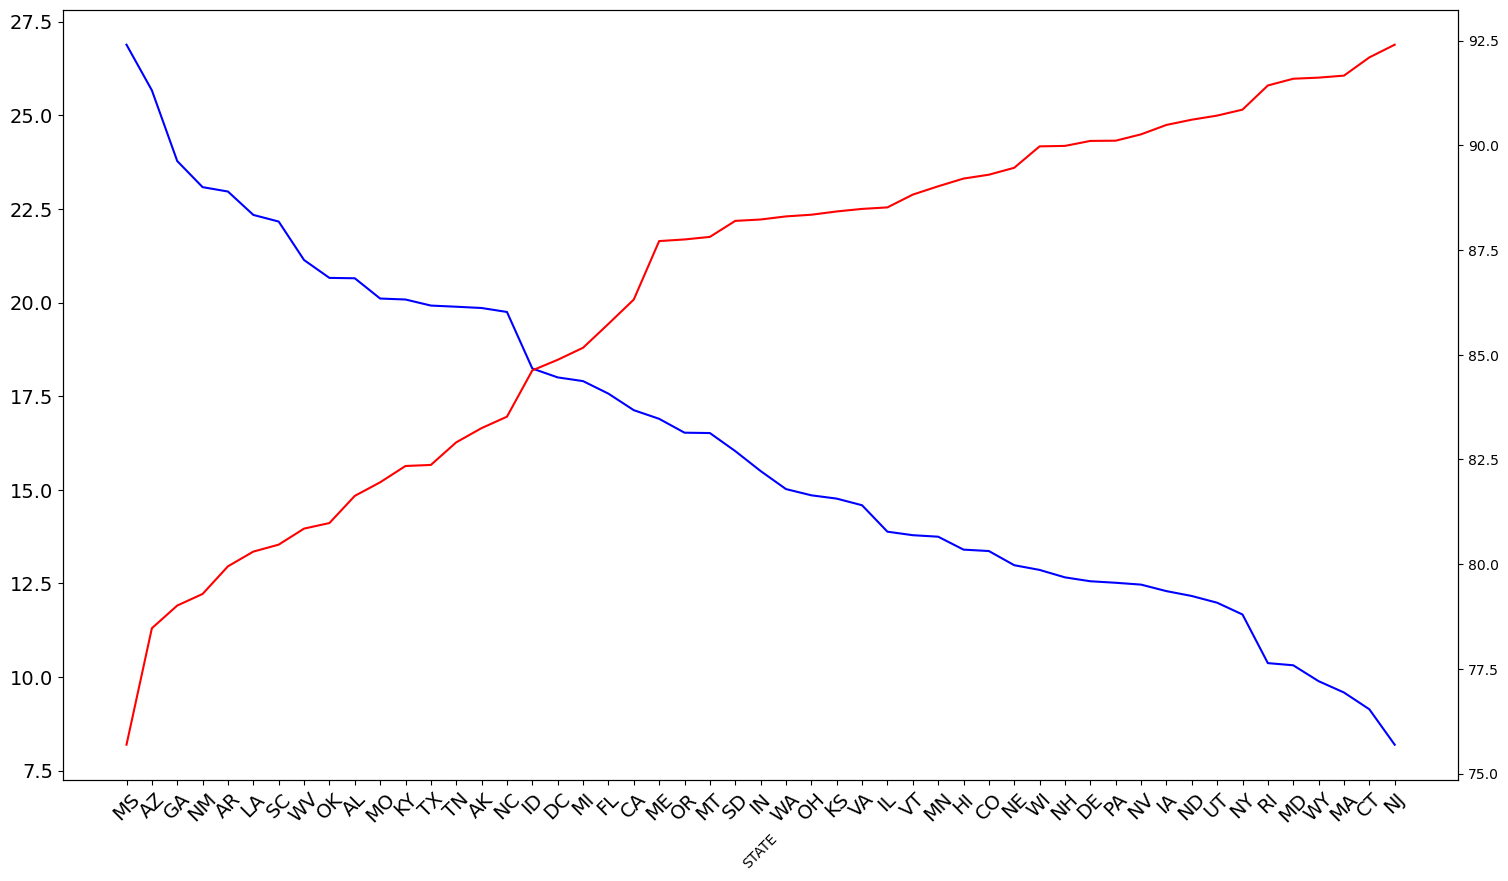

In [24]:
plt.figure(figsize=(18, 10))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.xlabel("STATE", fontsize=10, rotation=45)


ax1 = plt.gca()
ax2 = ax1.twinx()
ax1 = ax1.plot(poverty_rate_by_state.index, poverty_rate_by_state.poverty_rate, color="blue")
ax2 = ax2.plot(poverty_rate_by_state.index, completed_hs_by_state.percent_completed_hs, color="red")
# ax1.set_ylabel("Poverty Rate", color="blue")
# ax2.set_ylabel("Completed High school", color="red)
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

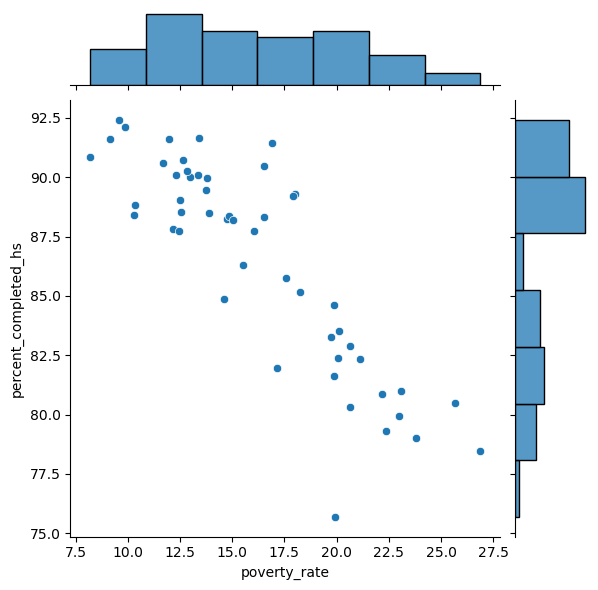

In [25]:
sns.jointplot(x=poverty_rate_by_state.poverty_rate, y=completed_hs_by_state.percent_completed_hs, kind="scatter")

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

<Axes: xlabel='poverty_rate', ylabel='percent_completed_hs'>

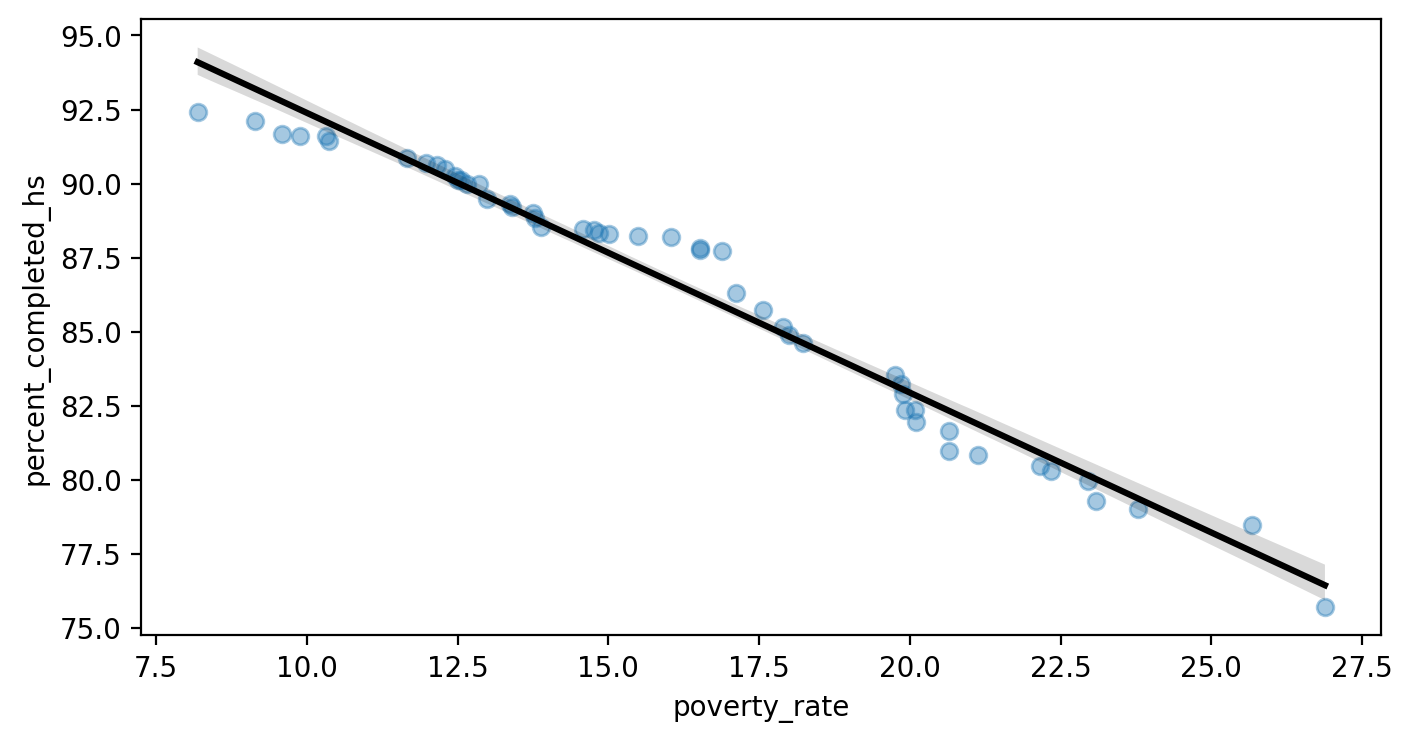

In [26]:
plt.figure(figsize=(8, 4), dpi=200)

sns.regplot(
x=poverty_rate_by_state.poverty_rate,
y=completed_hs_by_state.percent_completed_hs,
scatter_kws={"alpha": 0.4},
line_kws={"color":"black"}
)

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [27]:
df_share_race_city

Geographic area                    City share_white share_black  \
0                  AL              Abanda CDP        67.2        30.2   
1                  AL          Abbeville city        54.4        41.4   
2                  AL         Adamsville city        52.3        44.9   
3                  AL            Addison town        99.1         0.1   
4                  AL              Akron town        13.2        86.5   
...               ...                     ...         ...         ...   
29263              WY  Woods Landing-Jelm CDP        95.9           0   
29264              WY            Worland city        89.9         0.3   
29265              WY             Wright town        94.5         0.1   
29266              WY              Yoder town        97.4           0   
29267              WY           Y-O Ranch CDP        92.8         1.5   

      share_native_american share_asian share_hispanic  
0                         0           0            1.6  
1                       0.1           1            3.1  
2                       0.5         0.3            2.3  
3                         0         0.1            0.4  
4                         0           0            0.3  
...                     ...         ...            ...  
29263                     0         2.1              0  
29264                   1.3         0.6           16.6  
29265                   1.4         0.2            6.2  
29266                     0           0              4  
29267                   2.6           0           11.8  

[29268 rows x 7 columns]

In [28]:
df_share_race_city.share_white = df_share_race_city["share_white"].str.replace("(X)", "")

df_share_race_city.share_black = df_share_race_city["share_black"].str.replace("(X)", "")
df_share_race_city.share_native_american = df_share_race_city["share_native_american"].str.replace("(X)", "")
df_share_race_city.share_asian = df_share_race_city["share_asian"].str.replace("(X)", "")
df_share_race_city.share_hispanic = df_share_race_city["share_hispanic"].str.replace("(X)", "")

In [29]:
df_share_race_city
df_share_race_city.share_white = pd.to_numeric(df_share_race_city.share_white)
df_share_race_city.share_black = pd.to_numeric(df_share_race_city.share_black)
df_share_race_city.share_native_american = pd.to_numeric(df_share_race_city.share_native_american)
df_share_race_city.share_asian = pd.to_numeric(df_share_race_city.share_asian)
df_share_race_city.share_hispanic = pd.to_numeric(df_share_race_city.share_hispanic)

In [30]:
sum_total_by_race = df_share_race_city.groupby("Geographic area", as_index=False).agg({
    "share_white": pd.Series.sum,
    "share_black": pd.Series.sum,
    "share_native_american": pd.Series.sum,
    "share_asian": pd.Series.sum,
    "share_hispanic": pd.Series.sum
})

In [31]:
sum_total_by_race

Geographic area  share_white  share_black  share_native_american  \
0               AK    16,068.80       199.70              16,144.40   
1               AL    41,909.20    13,480.30                 381.10   
2               AR    42,441.20     8,816.60                 411.10   
3               AZ    27,028.00       430.50              12,894.00   
4               CA   108,949.30     4,081.10               2,612.20   
5               CO    40,197.90       420.30                 744.20   
6               CT    12,313.10       713.90                  93.90   
7               DC        38.50        50.70                   0.30   
8               DE     5,794.70     1,169.90                  39.80   
9               FL    72,378.70    12,301.20                 419.00   
10              GA    39,182.30    19,176.60                 188.00   
11              HI     5,038.80       161.70                  58.60   
12              IA    97,576.20       568.60                 273.80   
13              ID    20,161.60        67.00                 573.10   
14              IL   123,518.10     6,430.80                 357.90   
15              IN    64,669.90     1,151.40                 188.10   
16              KS    62,377.90       644.50               1,256.90   
17              KY    48,419.10     2,321.10                 110.30   
18              LA    30,657.30    14,556.80                 452.80   
19              MA    21,790.30       680.90                  64.70   
20              MD    37,356.30    10,082.30                 176.60   
21              ME    12,534.90       107.40                  71.40   
22              MI    62,744.70     2,854.00                 745.30   
23              MN    83,171.00       906.70               3,047.00   
24              MO    93,066.80     6,049.90                 560.10   
25              MS    19,475.60    15,143.90                 584.50   
26              MT    30,833.70        82.70               4,332.90   
27              NC    52,850.70    15,077.30               1,321.40   
28              ND    37,009.80       143.30               2,137.30   
29              NE    54,936.20       243.90                 904.70   
30              NH     9,185.40        68.70                  27.60   
31              NJ    44,084.80     3,801.40                 140.10   
32              NM    28,980.40       295.50               6,795.80   
33              NV    10,620.10       202.20                 719.40   
34              NY   105,676.30     4,765.20                 429.60   
35              OH   111,736.10     4,767.80                 258.90   
36              OK    53,454.60     2,474.80              10,542.10   
37              OR    32,947.20       199.10                 973.30   
38              PA   164,498.70     5,768.70                 285.00   
39              RI     3,033.70       101.60                  22.80   
40              SC    24,480.40    12,969.60                 182.80   
41              SD    33,078.90       113.10               4,690.40   
42              TN    38,158.30     3,132.90                 135.80   
43              TX   144,370.70    10,277.80               1,151.70   
44              UT    29,158.50       125.50               1,261.70   
45              VA    44,086.90     9,757.90                 202.30   
46              VT    11,408.10        91.70                  44.00   
47              WA    51,732.10       895.90               2,355.20   
48              WI    71,858.50       724.50               2,025.50   
49              WV    38,109.20     1,169.00                  80.30   
50              WY    18,659.50        80.70                 625.20   

    share_asian  share_hispanic  
0        488.70          756.50  
1        277.30        1,722.50  
2        258.10        2,311.70  
3        327.70        9,085.20  
4      8,441.40       44,949.20  
5        528.90        8,197.60  
6        427.50        1,140.50  
7          3.50            9.10  
8   

In [32]:
sums = sum_total_by_race[["share_white", 'share_black', "share_hispanic", "share_asian", "share_native_american"]].sum()


In [33]:
sums

share_white             2,433,809.00
share_black               199,898.60
share_hispanic            272,867.90
share_asian                45,156.50
share_native_american      84,094.90
dtype: float64

In [34]:
people_killed_by_race_pie_chart = px.pie(sum_total_by_race, values=sums.values, names=sums.index)
people_killed_by_race_pie_chart.show()

In [35]:
bar_2 = px.bar(sum_total_by_race, x="Geographic area", y=["share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"])
bar_2.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [36]:
df_fatalities

id                name      date   manner_of_death       armed   age  \
0        3          Tim Elliot  02/01/15              shot         gun 53.00   
1        4    Lewis Lee Lembke  02/01/15              shot         gun 47.00   
2        5  John Paul Quintero  03/01/15  shot and Tasered     unarmed 23.00   
3        8     Matthew Hoffman  04/01/15              shot  toy weapon 32.00   
4        9   Michael Rodriguez  04/01/15              shot    nail gun 39.00   
...    ...                 ...       ...               ...         ...   ...   
2530  2822    Rodney E. Jacobs  28/07/17              shot         gun 31.00   
2531  2813               TK TK  28/07/17              shot     vehicle  0.00   
2532  2818  Dennis W. Robinson  29/07/17              shot         gun 48.00   
2533  2817       Isaiah Tucker  31/07/17              shot     vehicle 28.00   
2534  2815        Dwayne Jeune  31/07/17              shot       knife 32.00   

     gender race           city state  signs_of_mental_illness threat_level  \
0         M    A        Shelton    WA                     True       attack   
1         M    W          Aloha    OR                    False       attack   
2         M    H        Wichita    KS                    False        other   
3         M    W  San Francisco    CA                     True       attack   
4         M    H          Evans    CO                    False       attack   
...     ...  ...            ...   ...                      ...          ...   
2530      M    0    Kansas City    MO                    False       attack   
2531      M    0    Albuquerque    NM                    False       attack   
2532      M    0          Melba    ID                    False       attack   
2533      M    B        Oshkosh    WI                    False       attack   
2534      M    B       Brooklyn    NY                     True       attack   

             flee  body_camera  
0     Not fleeing        False  
1     Not fleeing        False  
2     Not fleeing        False  
3     Not fleeing        False  
4     Not fleeing        False  
...           ...          ...  
2530  Not fleeing        False  
2531          Car        False  
2532          Car        False  
2533          Car         True  
2534  Not fleeing        False  

[2535 rows x 14 columns]

In [37]:
people_killed_by_race = df_fatalities['race'].value_counts()
people_killed_by_race

race
W    1201
B     618
H     423
0     195
A      39
N      31
O      28
Name: count, dtype: int64

In [38]:
people_killed_by_race_pie_chart = px.pie(people_killed_by_race, values=people_killed_by_race.values, names=people_killed_by_race.index)
people_killed_by_race_pie_chart.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [39]:
gender = df_fatalities["gender"].value_counts()
gender

gender
M    2428
F     107
Name: count, dtype: int64

In [40]:
bar = px.bar(x=gender.index, y=gender.values, title="Count Of Men and Women")
bar.update_layout(xaxis_title="Gender", yaxis_title="Count_of_me_and_women")

bar.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [41]:
fig = px.box(df_fatalities, x="gender", y="age", color="manner_of_death")
fig.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [42]:
armed = df_fatalities.groupby("armed").size()
armed

armed
0                    9
Taser                9
air conditioner      1
ax                   9
baseball bat         8
                  ... 
toy weapon         104
unarmed            171
undetermined       117
unknown weapon      18
vehicle            177
Length: 69, dtype: int64

In [43]:
armed_men_killed = px.pie(armed, values=armed.values, names=armed.index)
armed_men_killed.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [45]:
under_25_df = df_fatalities[df_fatalities["age"] < 25]
len_under_25 = len(under_25_df)
len_fatalities = len(df_fatalities)
percentage_under_25 = (len_under_25 / len_fatalities) * 100
print(f"The  percentage of people killed under 25 is {percentage_under_25}%")

The  percentage of people killed under 25 is 20.78895463510848%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

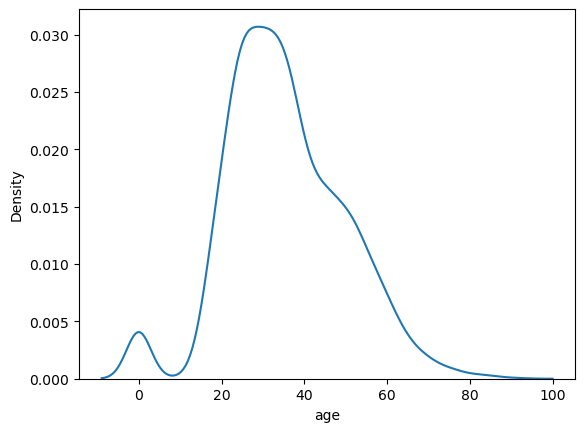

In [46]:
kde = sns.kdeplot(df_fatalities, x="age")


Create a seperate KDE plot for each race. Is there a difference between the distributions? 

<Axes: xlabel='age', ylabel='Density'>

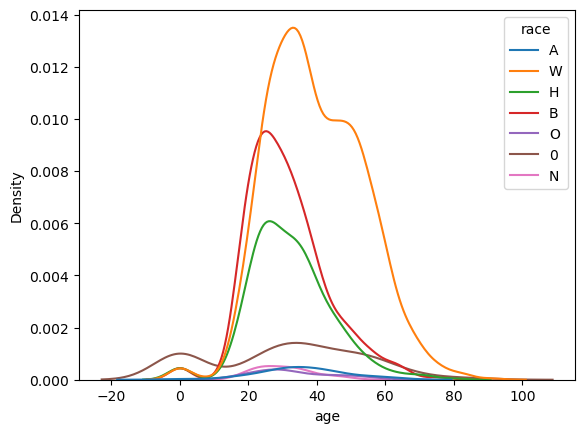

In [47]:
sns.kdeplot(df_fatalities, x="age", hue="race")

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [48]:
death_by_race = df_fatalities.groupby("race").size()

In [49]:
bar_death_by_race = px.bar(x=death_by_race.index, y=death_by_race.values)
bar_death_by_race.update_layout(xaxis_title="Race", yaxis_title="Count_of_Death")
bar_death_by_race.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [53]:
mental_illness = len(df_fatalities[df_fatalities.signs_of_mental_illness == True])
len_df_fatalities = len(df_fatalities)
percent_of_mental_illness = (mental_illness / len_df_fatalities) * 100
print(f"The percentage of people with mental illness - {percent_of_mental_illness}%")

The percentage of people with mental illness - 24.970414201183434%


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [54]:
top_ten_cities = df_fatalities['city'].value_counts().nlargest(10)
top_ten_cities

city
Los Angeles    39
Phoenix        31
Houston        27
Chicago        25
Las Vegas      21
San Antonio    20
Columbus       19
Austin         18
Miami          18
St. Louis      15
Name: count, dtype: int64

In [55]:
bar_death_by_race = px.bar(x=top_ten_cities.index, y=top_ten_cities.values)
bar_death_by_race.update_layout(xaxis_title="City", yaxis_title="Count_of_Death")
bar_death_by_race.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [56]:
top_10_df = df_fatalities[df_fatalities['city'].isin(top_ten_cities.index)]


In [57]:
race_share_top_10_cities = top_10_df['race'].value_counts(normalize=True) * 100

In [60]:
race_share_top_10_cities

race
B   37.34
H   26.61
W   25.75
0    7.30
N    1.72
A    0.86
O    0.43
Name: proportion, dtype: float64

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [61]:
df_fatalities

id                name      date   manner_of_death       armed   age  \
0        3          Tim Elliot  02/01/15              shot         gun 53.00   
1        4    Lewis Lee Lembke  02/01/15              shot         gun 47.00   
2        5  John Paul Quintero  03/01/15  shot and Tasered     unarmed 23.00   
3        8     Matthew Hoffman  04/01/15              shot  toy weapon 32.00   
4        9   Michael Rodriguez  04/01/15              shot    nail gun 39.00   
...    ...                 ...       ...               ...         ...   ...   
2530  2822    Rodney E. Jacobs  28/07/17              shot         gun 31.00   
2531  2813               TK TK  28/07/17              shot     vehicle  0.00   
2532  2818  Dennis W. Robinson  29/07/17              shot         gun 48.00   
2533  2817       Isaiah Tucker  31/07/17              shot     vehicle 28.00   
2534  2815        Dwayne Jeune  31/07/17              shot       knife 32.00   

     gender race           city state  signs_of_mental_illness threat_level  \
0         M    A        Shelton    WA                     True       attack   
1         M    W          Aloha    OR                    False       attack   
2         M    H        Wichita    KS                    False        other   
3         M    W  San Francisco    CA                     True       attack   
4         M    H          Evans    CO                    False       attack   
...     ...  ...            ...   ...                      ...          ...   
2530      M    0    Kansas City    MO                    False       attack   
2531      M    0    Albuquerque    NM                    False       attack   
2532      M    0          Melba    ID                    False       attack   
2533      M    B        Oshkosh    WI                    False       attack   
2534      M    B       Brooklyn    NY                     True       attack   

             flee  body_camera  
0     Not fleeing        False  
1     Not fleeing        False  
2     Not fleeing        False  
3     Not fleeing        False  
4     Not fleeing        False  
...           ...          ...  
2530  Not fleeing        False  
2531          Car        False  
2532          Car        False  
2533          Car         True  
2534  Not fleeing        False  

[2535 rows x 14 columns]

In [62]:
by_state = df_fatalities.groupby("state").size()

In [63]:
fig = px.choropleth(by_state, locations=by_state.index, color=by_state.values, locationmode="USA-states", scope="usa", color_continuous_scale=px.colors.sequential.Agsunset)

In [64]:
fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [65]:
df_fatalities.date = pd.to_datetime(df_fatalities.date)

C:\Users\PABLO\AppData\Local\Temp\ipykernel_9276\1103991209.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [66]:
count_by_year = df_fatalities.groupby("date").size()


In [67]:
count_by_year

date
2015-01-03    3
2015-01-04    2
2015-01-06    1
2015-01-07    2
2015-01-08    2
             ..
2017-12-03    2
2017-12-04    1
2017-12-05    4
2017-12-06    4
2017-12-07    3
Length: 879, dtype: int64

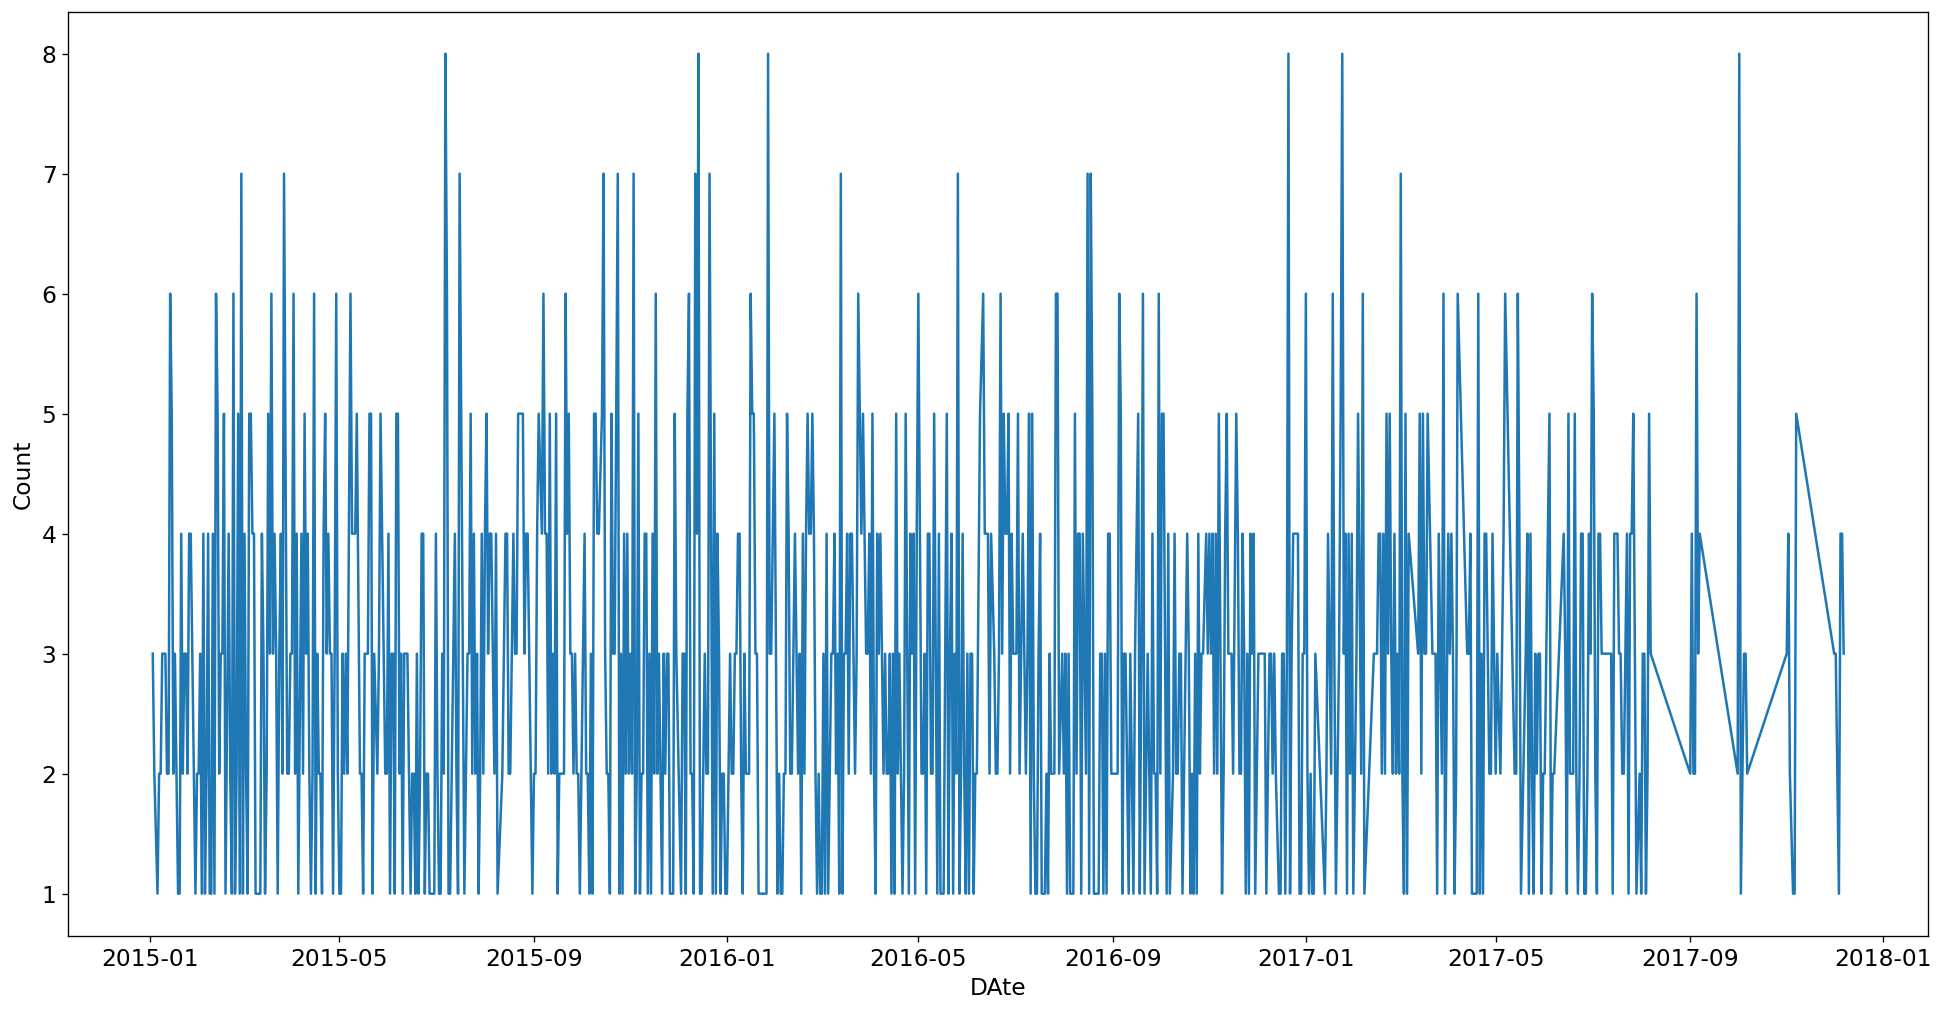

In [68]:
plt.figure(figsize=(20, 10), dpi=120)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("DAte", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.plot(count_by_year.index, count_by_year.values)